# **Data Exploration**

link : https://www.kaggle.com/blastchar/telco-customer-churn/download

In [187]:
import pandas as pd

data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [188]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [189]:
import numpy as np

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have to convert TotalCharges to float64

In [0]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

data = data.dropna(how = "any")
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [191]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is not null values in this dataset

List of categorical data and list of numerical data

In [0]:
categorical = ['gender','SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
# SeniorCitizen is binary then it is a categorical data

numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

Quantitative data analysis

In [193]:
data[numerical].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


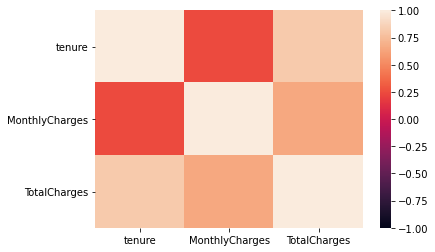

In [194]:
import seaborn as sns

sns.heatmap(data[numerical].corr(), vmin=-1, vmax=1)

Qualitative data analysis

In [195]:
for i in categorical :
  print(i)
  print(data[i].value_counts())
  print()

gender
Male      3549
Female    3483
Name: gender, dtype: int64

SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

TechSupport
No           

# **Preprocessing**

Binarization of the target

In [0]:
data2 = data.copy()

In [0]:
data2.Churn.replace(['Yes', 'No'], [1, 0], inplace=True)

Encoding of the categorical features

In [198]:
from sklearn.preprocessing import LabelEncoder

categorical2 = ['gender','SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
# Without Churn column

for i in categorical2 :
  encoded_col = LabelEncoder().fit_transform(data2[[i]])
  data2[i] = encoded_col

data2.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Cramer's V

In [0]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [0]:
rows= []

for var1 in categorical2:
  col = []
  for var2 in categorical2 :
    cramers =cramers_V(data2[var1], data2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = categorical2, index =categorical2)

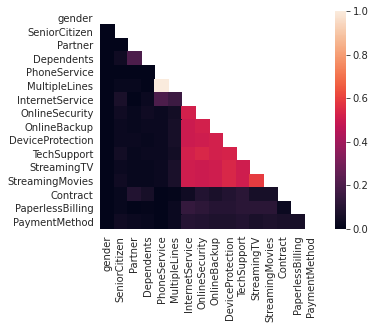

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

Train/test split

In [0]:
X = data2[[i for i in data2.columns if i not in ['Churn']]]
y = data2[['Churn']]

from sklearn.model_selection import train_test_split
xtrain_id, xtest_id, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state = 0)

Removing of ID columns

In [0]:
xtrain = xtrain_id.drop('customerID', axis=1).copy()
xtest = xtest_id.drop('customerID', axis=1).copy()

# **Neural Network**

Modelisation

In [204]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import Sequential

tf.random.set_seed(0)





model = Sequential()

model.add(Dense(units=19, activation='relu', name="ReLu_Layer_1"))
model.add(Dense(units=30, activation='relu', name="ReLu_Layer_2"))
model.add(Dense(units=1, activation='sigmoid', name='Output_Layer'))

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['binary_accuracy'])


model.fit(xtrain, np.array(ytrain).ravel(), epochs =30)


pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)




from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(ytrain), model.predict_proba(xtrain))
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(ytest), model.predict_proba(xtest))
auc_test = metrics.auc(fpr,tpr)


print("Train AUC : " + str(round(auc_train,3)))
print("Test AUC : " + str(round(auc_test,3)))


Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

154/154 [==============================] - 0s 1ms/step - loss: 1.8649 - binary_accuracy: 0.6934
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 1.0267 - binary_accuracy: 0.7253
Epoch 3/30
154/154 [==============================] - 0s 1ms/step - loss: 0.7093 - binary_accuracy: 0.7466
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 0.9077 - binary_accuracy: 0.7403
Epoch 5/30
154/154 [==============================] - 0s 1ms/step - loss: 0.9722

ROC Curve

In [205]:
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics

y_prob = model.predict_proba(xtest)
fpr, tpr, _ = metrics.roc_curve(np.array(ytest), y_prob)
auc = metrics.auc(fpr,tpr)

y_prob2 = model.predict_proba(xtrain)
fpr2, tpr2, _ = metrics.roc_curve(np.array(ytrain), y_prob2)
auc2 = metrics.auc(fpr2,tpr2)



p = figure(title="ROC Curve - Neural Network")
p.xaxis.axis_label = 'FPR'
p.yaxis.axis_label = 'TPR'
r2 = p.line(fpr2,tpr2,color='orange',legend = 'Train AUC = '+ str(round(auc2,3)), line_width=2)
r = p.line(fpr,tpr,color='green',legend = 'Test AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
p.legend.location = "top_left"

show(p)

# **Get Probability**

Probanility for the test sample

In [207]:
proba = xtest_id.copy()
proba['Churn'] = ytest['Churn']
proba['Probability'] = model.predict(xtest)
proba

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Probability
5561,5088-QZLRL,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,2,20.65,20.65,0,0.324301
5814,0787-LHDYT,1,0,0,0,16,1,0,2,1,1,1,1,1,1,0,1,1,20.60,330.25,0,0.110419
2645,8562-GHPPI,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,1,19.80,19.80,0,0.365470
3983,1334-FJSVR,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.25,24.25,1,0.459027
6438,3551-HUAZH,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,74.40,74.40,1,0.859819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,2650-GYRYL,1,0,1,1,33,1,0,2,1,1,1,1,1,1,1,1,0,19.45,600.25,0,0.019749
2687,5213-TWWJU,1,0,0,0,28,1,0,1,0,0,2,2,0,2,0,0,2,91.00,2626.15,0,0.278005
5843,1480-IVEVR,1,1,1,0,35,1,2,1,0,0,2,0,0,0,1,1,0,81.60,2815.25,0,0.464914
3576,2560-QTSBS,0,0,1,1,72,1,2,2,1,1,1,1,1,1,1,1,0,23.30,1623.15,0,0.004189
